### Data Exploration & Visualization

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Loading Apple Inc. stock prices that can be easily downloaded for free from [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL/history?p=AAPL)

In [93]:
from utils import get_apple_stock, load_csv_with_dates

In [94]:
apple_stock = load_csv_with_dates('datasets/AAPL_yahoo-finance_19801212-20190531.csv')

# for the sake of simplicity I'm gonna drop Adj Close column
apple_stock.drop(columns='Adj Close', inplace=True)

In [92]:
apple_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,18362400.0


In [23]:
print('Total data points: {}'.format(len(apple_stock)))
print('From {} to {}'.format(apple_stock.index[0], apple_stock.index[-1]))

Total data points: 9699
From 1980-12-12 00:00:00 to 2019-05-31 00:00:00


Do we have null values? and how many?

In [24]:
apple_stock.isnull().any()

Open      True
High      True
Low       True
Close     True
Volume    True
dtype: bool

In [25]:
apple_stock.isnull().sum()

Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

In [26]:
apple_stock[apple_stock['Close'].isnull()]

,Open,High,Low,Close,Volume
Date,,,,,
1981-08-10,NaN,NaN,NaN,NaN,NaN


In [27]:
from utils import get_range

In [28]:
get_range('1981-08-07', '1981-08-11', apple_stock)

,Open,High,Low,Close,Volume
Date,,,,,
1981-08-07,0.450893,0.453125,0.450893,0.450893,2301600.0
1981-08-10,NaN,NaN,NaN,NaN,NaN
1981-08-11,0.441964,0.441964,0.437500,0.437500,17864000.0


Let's populate this value with mean of the other two

In [29]:
apple_stock.loc['1981-08-10'] = (apple_stock.loc['1981-08-07'] + apple_stock.loc['1981-08-11']) / 2

In [30]:
get_range('1981-08-07', '1981-08-11', apple_stock)

,Open,High,Low,Close,Volume
Date,,,,,
1981-08-07,0.450893,0.453125,0.450893,0.450893,2301600.0
1981-08-10,0.446429,0.447545,0.444196,0.444196,10082800.0
1981-08-11,0.441964,0.441964,0.437500,0.437500,17864000.0


Descriptive Statistics:

In [31]:
apple_stock.describe()

,Open,High,Low,Close,Volume
count,9699.000000,9699.000000,9699.000000,9699.000000,9.699000e+03
mean,27.943288,28.212760,27.659935,27.943220,8.696928e+07
std,49.277582,49.707736,48.844054,49.288333,8.650217e+07
min,0.198661,0.198661,0.196429,0.196429,3.472000e+05
25%,1.057143,1.077857,1.035714,1.058036,3.368495e+07
50%,1.678571,1.718750,1.651786,1.683036,5.880980e+07
75%,27.407142,27.742143,27.095714,27.362857,1.084856e+08
max,230.779999,233.470001,229.779999,232.070007,1.855410e+09


Let's plot the closing prices over time

In [32]:
from utils import plot_field_over_time

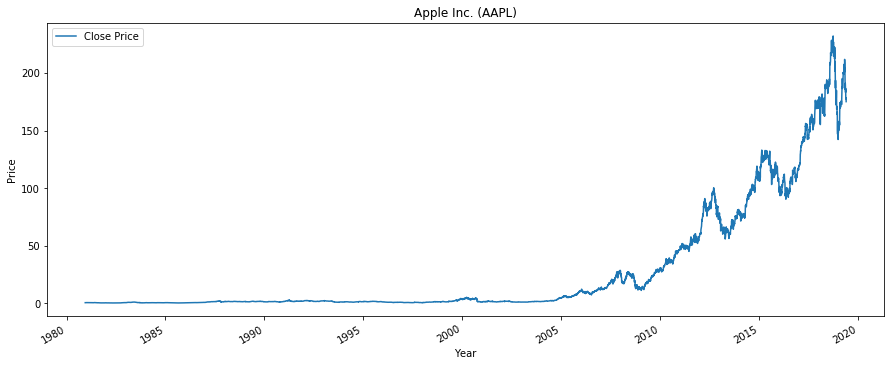

In [34]:
plot_field_over_time(apple_stock, ylabel='Price', ylegend='Close Price', title='Apple Inc. (AAPL)')

The dataset is non-stationary, meaning that the mean and the variance of the observations change over time

How about the volumen?

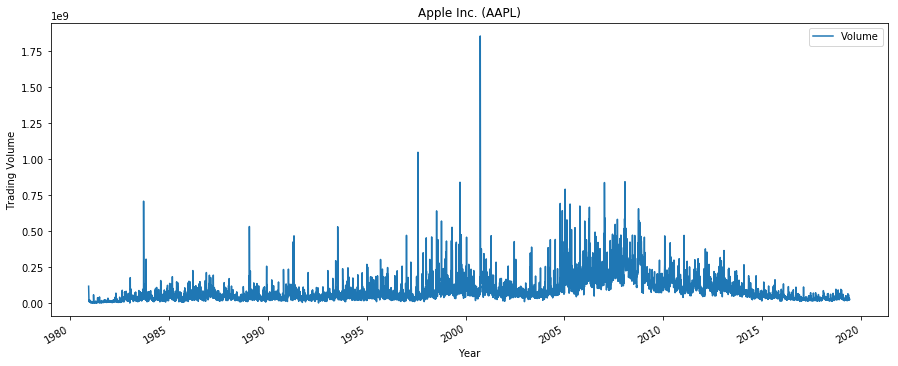

In [35]:
plot_field_over_time(apple_stock, y='Volume', ylabel='Trading Volume', title='Apple Inc. (AAPL)')

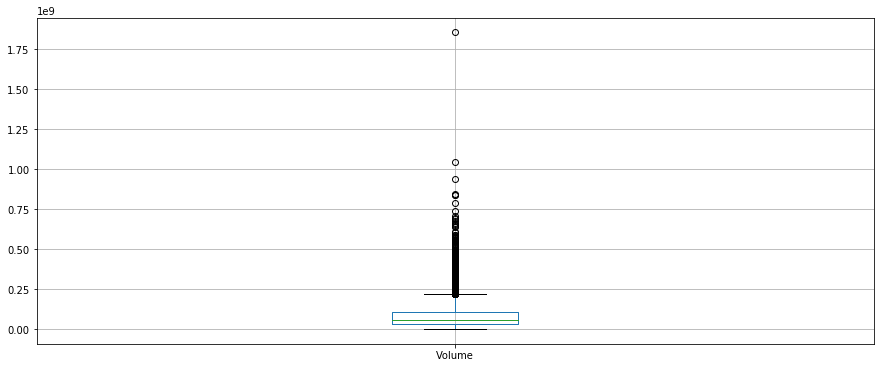

In [36]:
figsize=(15, 6)
apple_stock[['Volume']].boxplot(figsize=figsize)

Distribution of observations, it means values without the temporal ordering:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd755c34be0>,
      dtype=object)

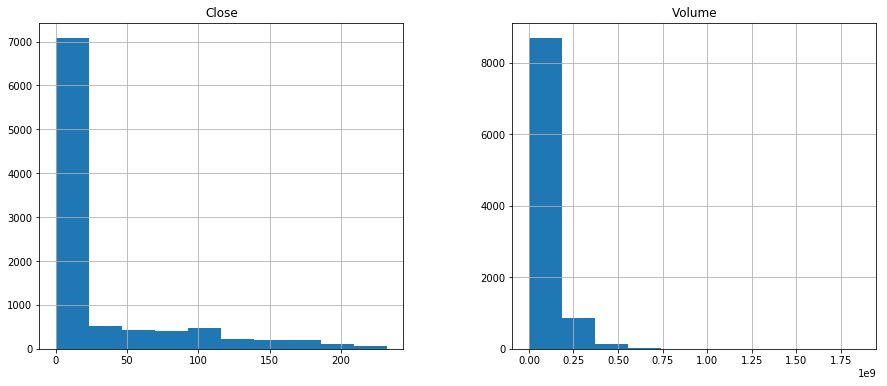

In [41]:
apple_stock[['Close', 'Volume']].hist(figsize=(15, 6))

Let's zoom in and plot 2015, 2016, 2017 and 2018 prices:

In [53]:
apple_stock_2015 = get_range('2015-01-01', '2015-12-31', apple_stock)
apple_stock_2016 = get_range('2016-01-01', '2016-12-31', apple_stock)
apple_stock_2017 = get_range('2017-01-01', '2017-12-31', apple_stock)
apple_stock_2018 = get_range('2018-01-01', '2018-12-31', apple_stock)

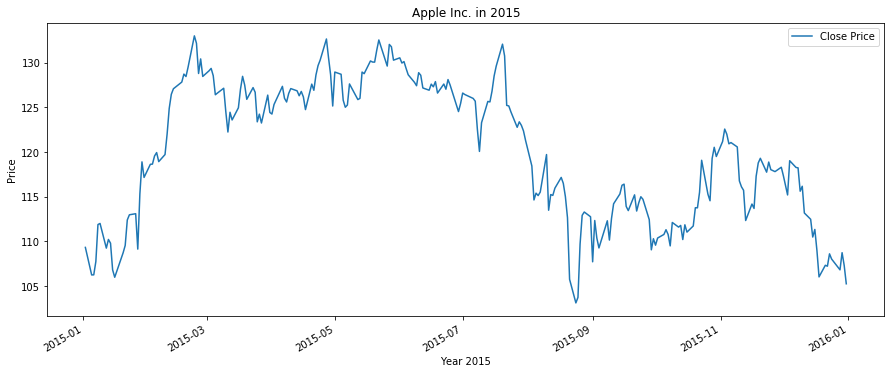

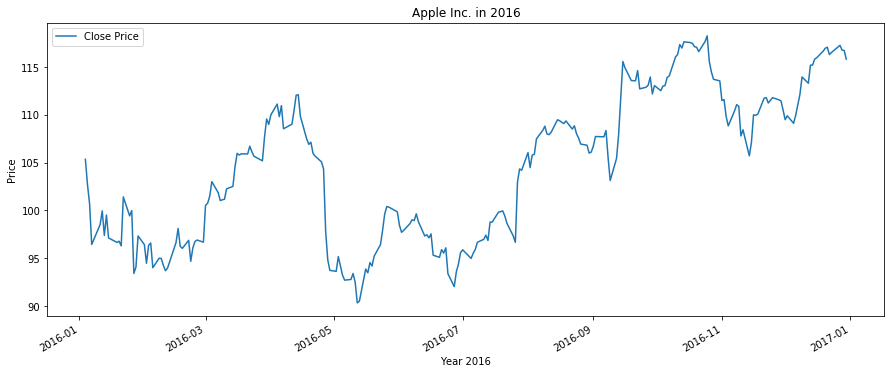

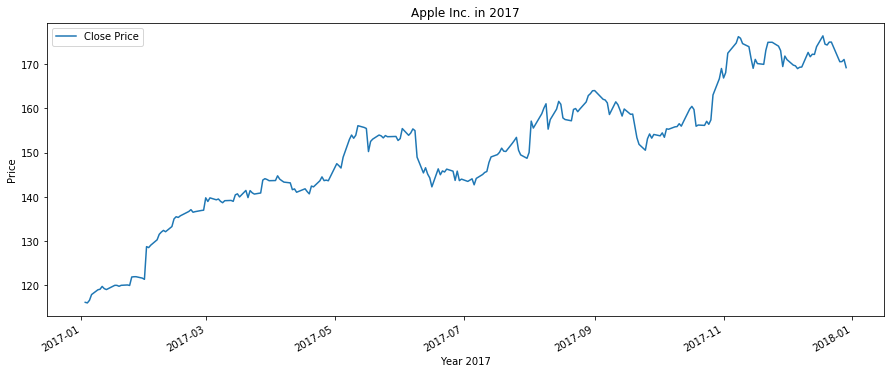

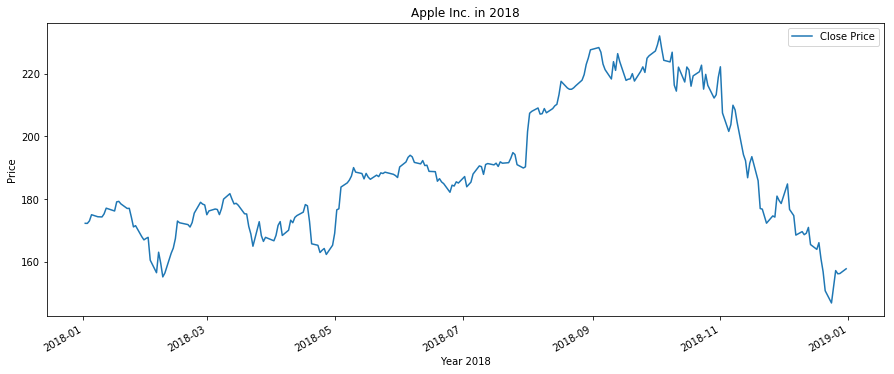

In [54]:
plot_field_over_time(apple_stock_2015, 
                     xlabel='Year 2015', 
                     ylabel='Price', 
                     ylegend='Close Price', 
                     title='Apple Inc. in 2015')

plot_field_over_time(apple_stock_2016, 
                     xlabel='Year 2016', 
                     ylabel='Price', 
                     ylegend='Close Price', 
                     title='Apple Inc. in 2016')

plot_field_over_time(apple_stock_2017, 
                     xlabel='Year 2017', 
                     ylabel='Price', 
                     ylegend='Close Price', 
                     title='Apple Inc. in 2017')

plot_field_over_time(apple_stock_2018, 
                     xlabel='Year 2018', 
                     ylabel='Price', 
                     ylegend='Close Price', 
                     title='Apple Inc. in 2018')

A nice visualization would be using candlesticks. We need to import the necessary libs

In [55]:
from utils import plot_candlestick

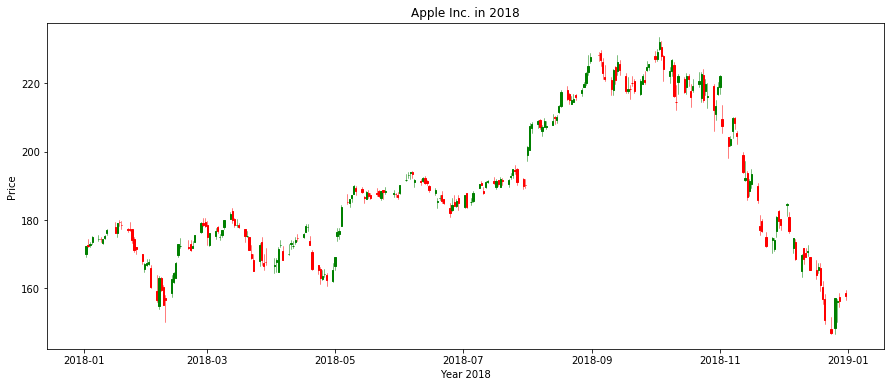

In [57]:
plot_candlestick(apple_stock_2018, xlabel='Year 2018', ylabel='Price', title='Apple Inc. in 2018')

Let's zoom in a bit more. Oct, Nov and Dec 2018:

In [58]:
apple_stock_201810 = get_range('2018-10-01', '2018-10-31', apple_stock)
apple_stock_201811 = get_range('2018-11-01', '2018-11-30', apple_stock)
apple_stock_201812 = get_range('2018-12-01', '2018-12-31', apple_stock)

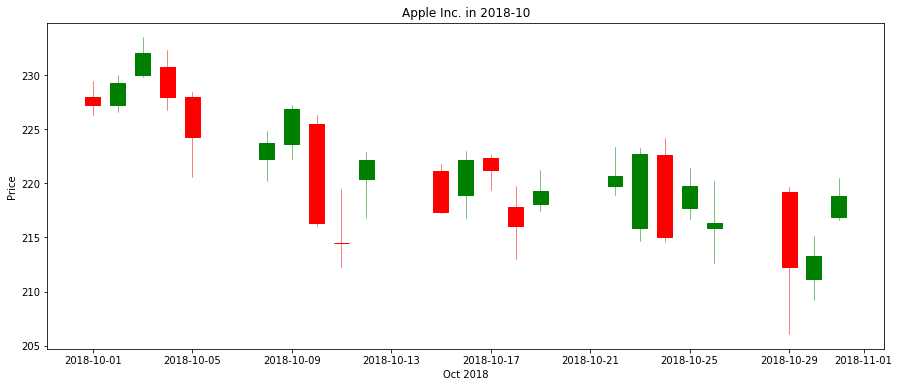

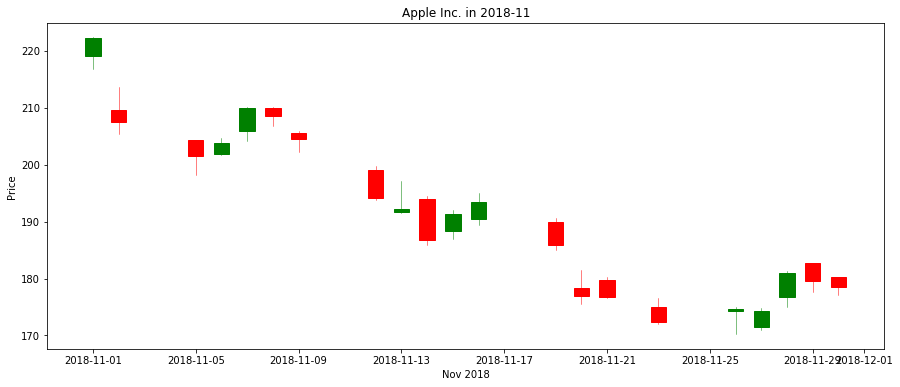

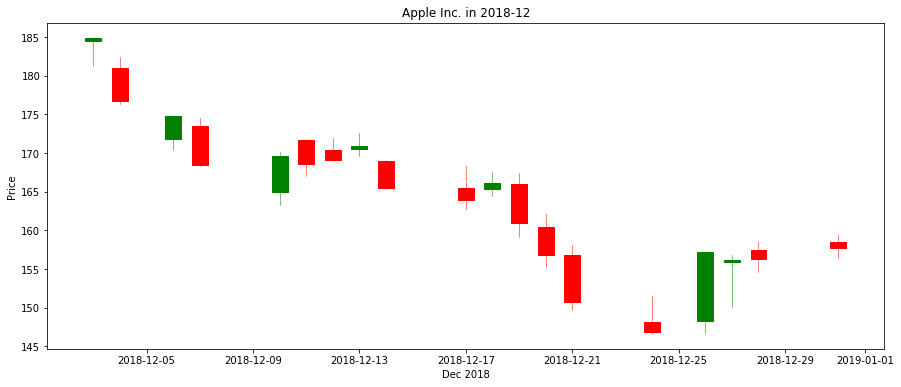

In [59]:
plot_candlestick(apple_stock_201810, title='Apple Inc. in 2018-10', xlabel='Oct 2018', ylabel='Price', )
plot_candlestick(apple_stock_201811, title='Apple Inc. in 2018-11', xlabel='Nov 2018', ylabel='Price', )
plot_candlestick(apple_stock_201812, title='Apple Inc. in 2018-12', xlabel='Dec 2018', ylabel='Price', )

I'd be curious to know what the time series look like after adjusting inflation. We need to first load the [Consumer Price Index for All Urban Consumers: All Items](https://fred.stlouisfed.org/series/CPIAUCSL)

In [60]:
# cpi = load_csv_with_dates('datasets/CPIAUCSL_FRED_19470101-20190401.csv') # Seasonally Adjusted
cpi = load_csv_with_dates('datasets/CPIAUCNS_FRED-19130101-20190401.csv') # Not Seasonally Adjusted

# We need to rename the index to be able to merge later on
cpi.rename_axis('Date', inplace=True)

In [61]:
cpi.head()

,CPIAUCNS
Date,
1913-01-01,9.8
1913-02-01,9.8
1913-03-01,9.8
1913-04-01,9.8
1913-05-01,9.7


In [62]:
print('Consumer Price Index from {} to {}'.format(cpi.index[0], cpi.index[-1]))

Consumer Price Index from 1913-01-01 00:00:00 to 2019-04-01 00:00:00


Let's visualize the inflation:

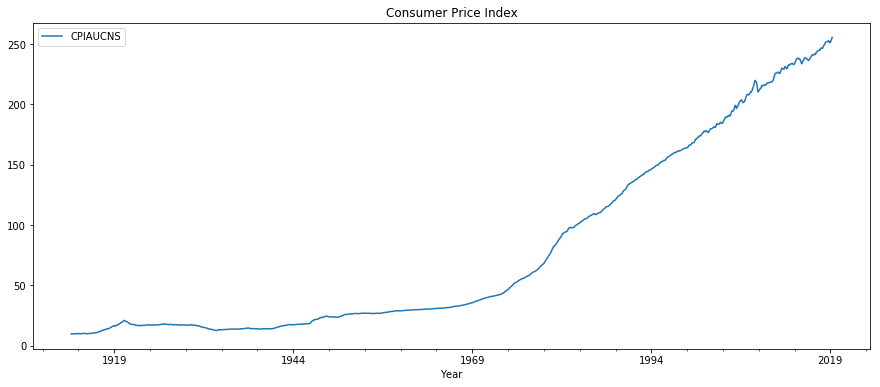

In [64]:
plot_field_over_time(cpi, y='CPIAUCNS', title='Consumer Price Index')

We're gonna add a new column, CPI_multiplier ([reference](https://towardsdatascience.com/adjusting-prices-for-inflation-in-pandas-daaaa782cd89))

In [65]:
cpi_with_mul = cpi.copy()
cpi_with_mul['CPI_Multiplier'] = cpi['CPIAUCNS'].iloc[-1] / cpi['CPIAUCNS']

In [68]:
cpi_with_mul.head()

,CPIAUCNS,CPI_Multiplier
Date,,
1913-01-01,9.8,26.076327
1913-02-01,9.8,26.076327
1913-03-01,9.8,26.076327
1913-04-01,9.8,26.076327
1913-05-01,9.7,26.345155


In [69]:
cpi_with_mul.tail()

,CPIAUCNS,CPI_Multiplier
Date,,
2018-12-01,251.233,1.017175
2019-01-01,251.712,1.015240
2019-02-01,252.776,1.010966
2019-03-01,254.202,1.005295
2019-04-01,255.548,1.000000


In [70]:
apple_stock_with_cpi = pd.merge(apple_stock, cpi_with_mul, left_index=True, right_index=True)

In [71]:
apple_stock_with_cpi['CPI_Adjusted_Price'] = \
    apple_stock_with_cpi['Close'] * apple_stock_with_cpi['CPI_Multiplier'] 

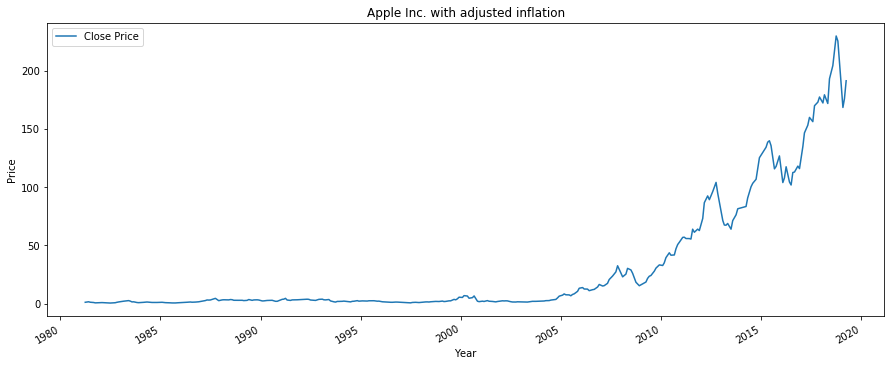

In [72]:
plot_field_over_time(apple_stock_with_cpi, 
                     y='CPI_Adjusted_Price', 
                     ylabel='Price', 
                     ylegend='Close Price',
                     title='Apple Inc. with adjusted inflation')

Let's plot both with and without adjusted inflation to better see the difference:

In [76]:
apple_close_with_cpi = pd.merge(apple_stock['Close'].to_frame(), 
                                apple_stock_with_cpi['CPI_Adjusted_Price'].to_frame(), 
                                left_index=True, 
                                right_index=True)

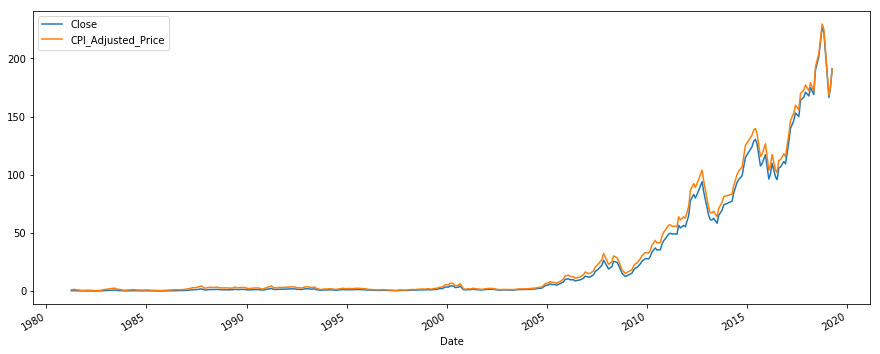

In [77]:
apple_close_with_cpi.plot(figsize=(15, 6))